In [43]:
import keras
import keras.datasets
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from keras.utils import to_categorical

In [23]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split

In [24]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [25]:
print(x_train.shape, x_test.shape)
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape( -1, 28,28,1)
x_test = x_test.reshape( -1, 28,28,1)
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
print(x_train.shape, x_test.shape, y_train_hot.shape, y_test_hot.shape)


(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [29]:
batch_size = 1024
epochs =20
num_classes = 10

In [30]:
def BuildModel1(input_shape=(28,28,1), convSize=(3,3), PoolSize=(2,2)):
    modelFM = Sequential()
    modelFM.add(Conv2D(32, kernel_size=convSize,
                       activation='linear',
                       input_shape=input_shape,padding="same"))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D((2, 2),padding='same'))
    modelFM.add(Conv2D(64, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Conv2D(128, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Flatten())
    modelFM.add(Dense(128, activation='linear'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(Dense(num_classes, activation='softmax'))
    return modelFM

In [31]:
modelFM = BuildModel1()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [32]:
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [33]:
model_train = modelFM.fit(tr_x, tr_y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(cv_x,cv_y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 127s 3ms/step - loss: 0.9853 - acc: 0.6635 - val_loss: 0.6212 - val_acc: 0.7660
Epoch 2/20
48000/48000 [==============================] - 109s 2ms/step - loss: 0.5143 - acc: 0.8130 - val_loss: 0.4881 - val_acc: 0.8175
Epoch 3/20
48000/48000 [==============================] - 108s 2ms/step - loss: 0.4152 - acc: 0.8536 - val_loss: 0.4236 - val_acc: 0.8483
Epoch 4/20
48000/48000 [==============================] - 105s 2ms/step - loss: 0.3700 - acc: 0.8665 - val_loss: 0.3647 - val_acc: 0.8690
Epoch 5/20
48000/48000 [==============================] - 105s 2ms/step - loss: 0.3407 - acc: 0.8793 - val_loss: 0.3398 - val_acc: 0.8758
Epoch 6/20
48000/48000 [==============================] - 108s 2ms/step - loss: 0.3213 - acc: 0.8857 - val_loss: 0.3223 - val_acc: 0.8865
Epoch 7/20
48000/48000 [==============================] - 110s 2ms/step - loss: 0.3034 - acc: 0.8909 - val_loss: 0.3357 - 

In [46]:
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 14s 1ms/step
Test loss: 0.2701905567407608
Test accuracy: 0.9095


In [34]:
def BuildModelWithDO(input_shape=(28,28,1), convSize=(3,3), PoolSize=(2,2)):
    modelFM = Sequential()
    modelFM.add(Conv2D(32, kernel_size=convSize,
                       activation='linear',
                       input_shape=input_shape,padding="same"))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D((2, 2),padding='same'))
    modelFM.add(Dropout(0.1))    
    modelFM.add(Conv2D(64, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Dropout(0.2))
    modelFM.add(Conv2D(128, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Dropout(0.3))
    modelFM.add(Flatten())
    modelFM.add(Dense(128, activation='linear'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(Dropout(0.3))
    modelFM.add(Dense(num_classes, activation='softmax'))
    return modelFM
modelFMDO = BuildModelWithDO()

In [35]:
modelFMDO.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [36]:
modelFMDO.summary()
model_trainDO = modelFMDO.fit(tr_x, tr_y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(cv_x,cv_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
__________

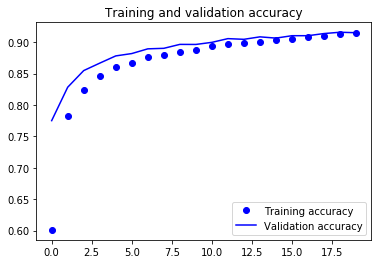

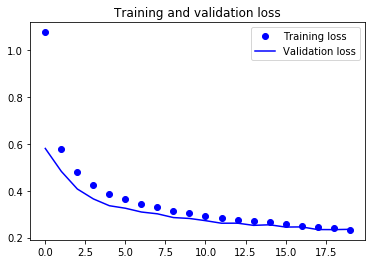

In [37]:
accuracy = model_trainDO.history['acc']
val_accuracy = model_trainDO.history['val_acc']
loss = model_trainDO.history['loss']
val_loss = model_trainDO.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
predicted_classes = modelFMDO.predict(x_test)

In [39]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [47]:
test_eval = modelFMDO.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 14s 1ms/step
Test loss: 0.24486115812659265
Test accuracy: 0.911
